# EP4210 Computational Physics

## Solving Differential Equations
### Ordinary Differential Equations (ODEs)
Ordinary differential equations are equations involving a function of one independent variable and its derivatives. They are used to model a wide range of phenomena, from population growth to electrical circuits. The general form of an ODE is: 
$$ \frac{dy}{dx} = f(x,y) $$
Order is the highest derivative in the equation. For example, the equation $y'' + 2y' + y = 0$ is a second-order ODE.
### Partial Differential Equations (PDEs)
Partial differential equations are equations involving a function of multiple independent variables and its partial derivatives. They are used to model a wide range of phenomena, from heat transfer to fluid dynamics. The general form of a PDE is: 
$$ \frac{\partial u}{\partial t} = f(x,y,z,u,\frac{\partial u}{\partial x},\frac{\partial u}{\partial y},\frac{\partial u}{\partial z}) $$
Poisson 's equation is a classic example of a PDE: $\nabla^2 u = \frac{\partial^2 u}{\partial x^2} = - \frac{\rho}{\epsilon_0}$

## Verlet's Method for Equation of motion
The equation of motion of a particle is given by the following differential equation:
$$ \frac{d^2x}{dt^2} = -\frac{\bar F}{m}$$
This is an initial value problem. To solve this, we need initial position $x_0$ and initial velocity $x_0'$. Its solution is:
$$ x(t) = x_0 + x_0't + \frac{\bar F}{2 m}t^2 = x_0 + ut + \frac 1 2 a t^2$$
$$ x'(t) = x_0' + \frac{\bar F}{m} t = u + at$$

From the Taylor Expansion,
$$\bar x(t+\Delta t) = \bar x(t) + \frac{d \bar x}{d t} \Delta t + \frac{d^2 \bar x}{d t^2} \frac {(\Delta t)^2}{2!} + O(\Delta t^3)$$
$$\bar x(t-\Delta t) = \bar x(t) - \frac{d \bar x}{d t} \Delta t + \frac{d^2 \bar x}{d t^2} \frac {(\Delta t)^2}{2!} + O(\Delta t^3)$$
From the above equations,
$$\bar x(t+\Delta t) + \bar x(t-\Delta t) = 2 \bar x(t) + \frac{d^2 \bar x}{d t^2} \frac {(\Delta t)^2}{2!} + O(\Delta t^4)$$
Meaning,
$$\bar x(t+\Delta t) \approx - \bar x(t-\Delta t) + 2 \bar x(t) + a(\Delta t)^2$$
Putting $t=0$,
$$\bar x(\Delta t) \approx - \bar x(-\Delta t) + 2 \bar x_0 + a(\Delta t)^2 + O(\Delta t^3)$$
We might not know $\bar x (- \Delta t)$, so we just approximate it.

### Exercise

Particle of unit mass moves under action of force $$F = sin(y) \hat x + cos(x) \hat y$$ Particle starts from the origin at $t=0$. Calculate and find the trajectory till $T=50$.

### Solution
We have two coupled ODEs
$$\frac{d^2 x}{d t^2} = sin(y)$$
$$\frac{d^2 y}{d t^2} = cos(x)$$
We may solve this in a rather brute-force manner. 
$$ \frac{d^2}{dt^2}  \begin{matrix} x \\ y\end{matrix} = \begin{matrix} sin(y) \\ cos(x)\end{matrix} $$

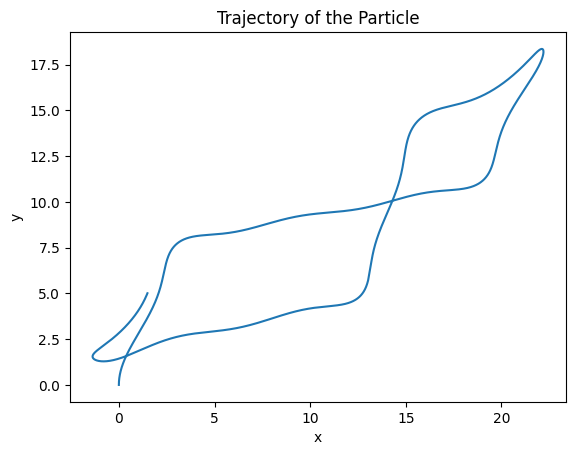

In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt

Fx = lambda y: math.sin(y)
Fy = lambda x: math.cos(x)

traj_x = []
traj_y = []

x0, y0 = 0, 0
v_x, v_y = 0, 0

x = x0
y = y0

dt = 1e-6
t = 0

x_pre_step = x0 - dt*v_x + 0.5*(dt**2)*Fx(y0)
y_pre_step = y0 - dt*v_y + 0.5*(dt**2)*Fy(x0)

while t < 50:
    new_x = x_pre_step + v_x*dt + (dt**2)*Fx(y)
    new_y = y_pre_step + v_y*dt + (dt**2)*Fy(x)

    t += dt

    v_x += Fx(y) * dt
    v_y += Fy(x) * dt

    traj_x.append(new_x)
    traj_y.append(new_y)

    
    x_pre_step, y_pre_step = x, y
    x, y = new_x, new_y

plt.plot(traj_x, traj_y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Particle')
plt.show()


In [13]:
def evolve(t, dt):
    Fx = lambda y: math.sin(y)
    Fy = lambda x: math.cos(x)

    traj_x = []
    traj_y = []

    x0, y0 = 0, 0
    v_x, v_y = 0, 0

    x = x0
    y = y0

    x_pre_step = x0 - dt*v_x + 0.5*(dt**2)*Fx(y0)
    y_pre_step = y0 - dt*v_y + 0.5*(dt**2)*Fy(x0)

    while t < 50:
        new_x = x_pre_step + v_x*dt + (dt**2)*Fx(y)
        new_y = y_pre_step + v_y*dt + (dt**2)*Fy(x)

        t += dt

        v_x += Fx(y) * dt
        v_y += Fy(x) * dt

        traj_x.append(new_x)
        traj_y.append(new_y)

        
        x_pre_step, y_pre_step = x, y
        x, y = new_x, new_y

    plt.plot(traj_x, traj_y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectory of the Particle')
    plt.show()

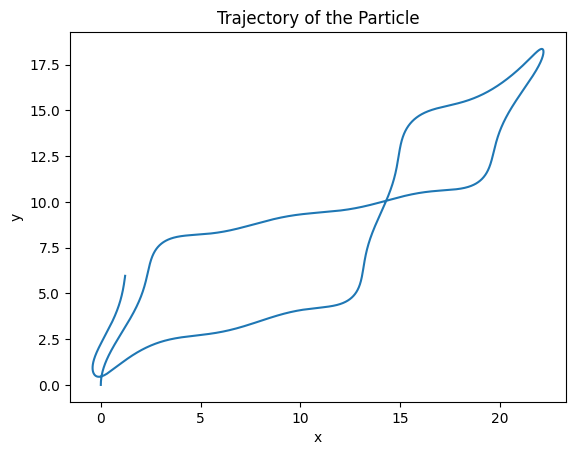

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define forces as functions
Fx = lambda y: math.sin(y)
Fy = lambda x: math.cos(x)

# Initial conditions
x0, y0 = 0, 0
v0_x, v0_y = 0, 0  # initial velocities

x = x0
y = y0
dt = 1e-5  # time step
t = 0  # time
trajectory = []

# Pre-step positions
x_pre_step = x0 - dt * v0_x + 0.5 * (dt**2) * Fx(y0)
y_pre_step = y0 - dt * v0_y + 0.5 * (dt**2) * Fy(x0)

# Start the time loop
while t < 50:
    # Update positions using the second-order kinematic equations
    new_x = x_pre_step + v0_x * dt + 0.5 * Fx(y) * dt**2
    new_y = y_pre_step + v0_y * dt + 0.5 * Fy(x) * dt**2
    
    # Update velocities (First derivative of position)
    v0_x += Fx(y) * dt
    v0_y += Fy(x) * dt
    
    # Append the new position to the trajectory
    trajectory.append((new_x, new_y))
    
    # Update time and variables for next iteration
    t += dt
    x_pre_step, y_pre_step = x, y
    x, y = new_x, new_y

# Convert trajectory to numpy array for easy plotting
trajectory = np.array(trajectory)

# Plot the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Particle')
plt.show()


In [15]:
def evolve_GPT(t, dt):
    # Define forces as functions
    Fx = lambda y: math.sin(y)
    Fy = lambda x: math.cos(x)

    # Initial conditions
    x0, y0 = 0, 0
    v0_x, v0_y = 0, 0  # initial velocities

    x = x0
    y = y0
    trajectory = []

    # Pre-step positions
    x_pre_step = x0 - dt * v0_x + 0.5 * (dt**2) * Fx(y0)
    y_pre_step = y0 - dt * v0_y + 0.5 * (dt**2) * Fy(x0)

    # Start the time loop
    while t < 50:
        # Update positions using the second-order kinematic equations
        new_x = x_pre_step + v0_x * dt + 0.5 * Fx(y) * dt**2
        new_y = y_pre_step + v0_y * dt + 0.5 * Fy(x) * dt**2
        
        # Update velocities (First derivative of position)
        v0_x += Fx(y) * dt
        v0_y += Fy(x) * dt
        
        # Append the new position to the trajectory
        trajectory.append((new_x, new_y))
        
        # Update time and variables for next iteration
        t += dt
        x_pre_step, y_pre_step = x, y
        x, y = new_x, new_y

    # Convert trajectory to numpy array for easy plotting
    trajectory = np.array(trajectory)

    # Plot the trajectory
    plt.plot(trajectory[:, 0], trajectory[:, 1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectory of the Particle')
    plt.show()

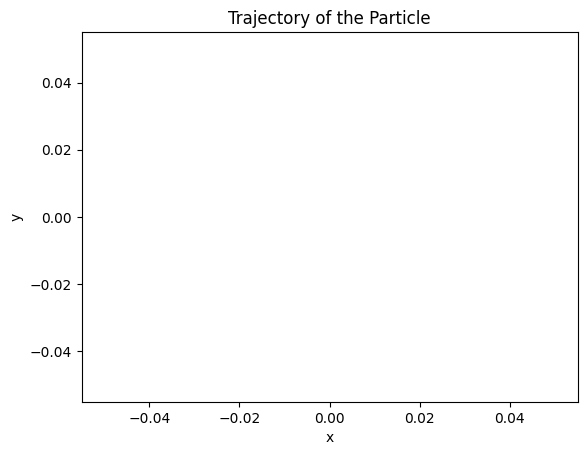

In [28]:
evolve(50, 1e-5)

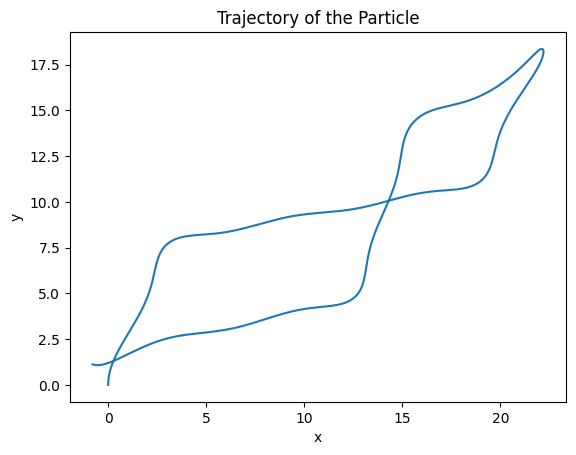

In [18]:
evolve_GPT(5, 0.001)

In [7]:
Fy(x0)

1.0

Do a convergence test, reducing $dt$ at every iteration and check if the solutions converge to the same.

## Runge-Kutta Method
Consider ODE of the form:
$$ \frac {df}{dx} = G(x, f(x)) $$
Any $n^{th}$ order ODE can be reduced to a system of first order ODEs by introducing new variables and then can be solved using the above method.

The initial point is given i.e, $f(x=a)=f_a$. The independent variable $x$ is divided into equal parts with step size $\Delta x$, such that $ x_n =  a+ n \Delta x, \ n=0,1,2 \ldots $. 

By definition of limits,
$$\lim_{\Delta x \to 0} \frac{f_{n+1}-f_n}{\Delta x} = G(x_n, f_n)$$
The above equation can be written as $f_{n+1} = f_n + \Delta x \ G(x_n, f_n)$. This is a linear approximation, also called Euler's method and the error is of order $O(\Delta x^2)$.

We can do better by using higher order terms in the taylor series.
$$f_{n+1} = f_n + \Delta x \ G(x_n, f_n) + \frac{\Delta x^2}{2} \Bigg[ \frac{\partial G_n}{\partial x} + \frac{\partial G_n}{\partial f} G_n \Bigg] + O(\Delta x^3)$$
$G$ will be known but the partial derivatives will be unknown \\
Now consider the Taylor series of $G$ around the following points: 

$$G\Bigg( x_n + \frac{\Delta x}2, f_n + \frac{\Delta x}2 G_n \Bigg) = G(x_n, f_n) + \frac{\Delta x}{2} \frac{\partial G}{\partial x} \Bigg|_{x_n} + \frac{\Delta x}{2} G_n \frac{\partial G}{\partial f} \Bigg|_{x_n} +O(\Delta x^2)$$

$$ G \Bigg(x_n + \frac{\Delta x}2, f_n + \frac{\Delta x}2 G_n \Bigg) - G_n = \frac{\Delta x}{2} \Bigg[ \frac{\partial G}{\partial x} + G_n \frac{\partial G}{\partial f} \Bigg] + O(\Delta x^2)$$

$$\implies f_{n+1} = f_n + \Delta x \  G \Bigg(x_n + \frac{\Delta x}2, f_n + \frac{\Delta x}2 G_n \Bigg) + O(\Delta x^3)$$
This is called the RK2 method and it is a two-step process. We evaluate the function at some intermediate point and then use that value to calculate the next value. We can do even better by using the Taylor series up to the 4th order. This is called the RK4 method. \\
We have to evaluate the derivatives of $G$ by alternate means.
$$\frac{\partial G}{\partial x} = \frac{G(x+\Delta x , f) - G(x, f)}{\Delta x} + O(\Delta x)$$
$$\frac{\partial G}{\partial f} = \frac{G(x, f+\Delta f) - G(x, f)}{\Delta f} + O(\Delta f)$$ 
$$ \frac{d^2 G}{dx^2} = \frac{d}{dx} \Bigg[ \frac{\partial G}{\partial x} + G_n \frac{\partial G}{\partial f}  \Bigg] + O(\Delta x^5)$$
The idea is to evaluate values of G at "good" points instead of derivatives and avoid derivatives at the first place.

$$f_{n+1} = f_n + \frac{\Delta x}{6} \Bigg[ k_1 + 2k_2 + 2k_3 + k _4 \Bigg]$$

For a $n^{th}$ order, we may need at most $(n+2)$ function evaluations.

### Equation of Motion 

To solve the equation of motion, we need to get the equation to RK form
$$ \frac{d\mathbf{x}}{dt} = \mathbf{f }(\mathbf{x}, t) $$
We define $s = \frac{dx}{dt}$ and we will have the required form.
$$ \frac{d}{dt} \Bigg[ \begin{matrix} x \\ s\end{matrix} \Bigg] = \Bigg[ \begin{matrix} s \\ a(x,t)\end{matrix} \Bigg]$$
We may define for convenience,
$$ f =  \begin{bmatrix} x \\ y \\ z \\ v_x \\ v_y \\ v_z \end{bmatrix}   and \ G =  \begin{bmatrix} v_x \\ v_y \\ v_z \\ a_x \\ a_y \\ a_z \end{bmatrix}  $$

### RK2 Algorithm
$$ k_1 = \Delta x \ G(x_n, f_n)$$
$$ k_2 = \Delta x \ G\Bigg( x_n + \frac{\Delta x}{2}, f_n + \frac {k_1} 2 \Bigg) $$
$$ f_{n+1} = f_n + k_2 $$

In [3]:
import math 
import numpy as np
import matplotlib.pyplot as plt

Fx = lambda y: math.sin(y)
Fy = lambda x: math.cos(x)

delta_t = 1e-5

def f(x, y):
    v_x = Fx(y) * delta_t
    v_y = Fy(x) * delta_t

    return np.array([x, y, v_x, v_y])


def G(x, y):
    v_x = Fx(y) * delta_t
    v_y = Fy(x) * delta_t

    a_x = Fx(x)
    a_y = Fy(y)

    return np.array([v_x, v_y, a_x, a_y])


t = 0
T = 50

init_x, init_y = 0, 0
x, y = init_x, init_y

f_state = f(x, y)

# TODO
    

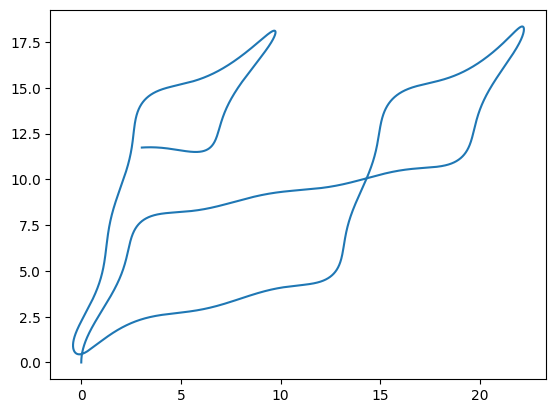

In [4]:
def deriv(farr, x):
    return np.array([farr[2], farr[3], np.sin(farr[1]), np.cos(farr[0])])

f0arr = np.array([0, 0, 0, 0])
dt = 1e-5
T = 50
N = int(T/dt)

fsol = []
fsol.append(f0arr)

time = 0.0

for i in range(0, N):
    k1 = dt*deriv(f0arr, time)
    k2 = dt*deriv(f0arr+0.5*k1, time+0.5*dt)
    f1arr = f0arr+k2
    time += dt
    fsol.append(f1arr)
    f0arr = f1arr

fsoln = np.array(fsol)
plt.plot(fsoln[:,0],fsoln[:,1])
plt.show()


## Predictor-Corrector Methods
These are a general class of methods for solving ODE's. Here the step is varied along different x.
$$1^{st} step: \tilde f_{n+1} = f_n + \Delta x \ G(x_n, f_n) $$
$$subsequent \ steps: \tilde f_{n+1} = f_n + \Delta x \Bigg[ \frac{G(x_n, f_n) + G(x_{n+1}, \tilde f_{n+1} ) } 2  \Bigg]$$
$$subsequent \ steps: \hat f_{n+1} = f_n + \Delta x \Bigg[ \frac{G(x_n, f_n) + G(x_{n+1}, \tilde f_{n+1} ) } 2  \Bigg]$$
$$ | \hat f_{n+1} - f_{n+1} | < \epsilon$$